# Using Regression to Predict Yelp Rating Score

## Load and Inspect Data:

In [1]:
import pandas as pd

## Read in Data:
businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

## Format
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

## Inspect each dataframe
#print("Businesses:")
#print(businesses.head(), "\n")
#print("Reviews:")
#print(reviews.head())
#users.head()
#checkins.head()
#tips.head()
#photos.head()

## Answer more questions about the data:
print("No. of Businesses:")
print(businesses.business_id.nunique(), "\n")
print("Columns in Reviews:")
print(reviews.columns, "\n")
print("Value Ranges for Users:")
print(users.describe())

No. of Businesses:
188593 

Columns in Reviews:
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object') 

Value Ranges for Users:
       average_number_friends  average_days_on_yelp  average_number_fans  \
count           188593.000000         188593.000000        188593.000000   
mean               105.132000           2005.367009            11.590148   
std                162.653680            554.174540            25.901801   
min                  1.000000             76.000000             0.000000   
25%                 26.666667           1647.000000             0.666667   
50%                 59.384615           1957.150000             3.583333   
75%                117.666667           2312.238095            11.555556   
max               4219.000000           4860.000000          1174.666667   

       average_review_count  average_numb

## Merge the Data from the Different Tables into One Table:

In [2]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
## Check
#print(len(df))

df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

## Check
print("Table Columns:")
print(df.columns)

Table Columns:
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


## Clean the Data:

In [3]:
## Remove unnecessary features
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

## Remove null values
#print(df.isna().any())

df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)
## Check
#print(df.isna().any())

## Make Correlation Matrix

In [5]:
print("Correlation Matrix:")
df.corr()

Correlation Matrix:


,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


## Plot Important Categories:

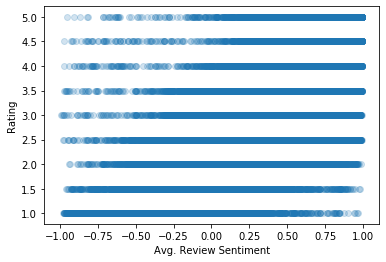

In [6]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=.2)
plt.xlabel("Avg. Review Sentiment")
plt.ylabel("Rating")

plt.show()

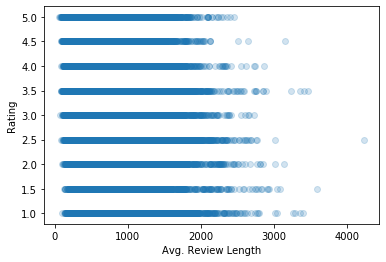

In [7]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=.2)
plt.xlabel("Avg. Review Length")
plt.ylabel("Rating")

plt.show()

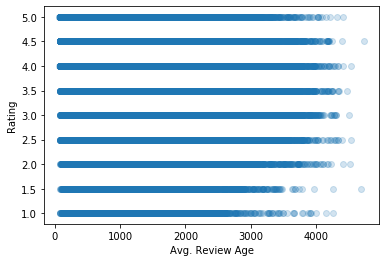

In [8]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=.2)
plt.xlabel("Avg. Review Age")
plt.ylabel("Rating")

plt.show()

Average review sentiment is a metric to see if a review was positive, negative, or neutral so a lower score relates to a lower yelp rating and a higher score to a higher rating. For the other categories, average review length seems to have a slightly negative correlation meaning that the lower ratings seem to write longer reviews, maybe to list more of their grievances. For average review age, it seems that the high and low rating categories are more likely to be more recent than the mid-range ratings.

## Separate Features and Split Data into Training and Testing Sets:

In [13]:
## Separate predictor and features
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = .2, random_state = 100)

## Fit the Model:

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Score the Model:

In [16]:
## Model's Accuracy Score
print("Training Set Score:")
print(model.score(X_train, y_train), "\n")
print("Test Set Score:")
print(model.score(X_test, y_test))

## Model's Coefficients
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

Training Set Score:
0.08164107349217942 

Test Set Score:
0.08444761569123238


[('average_review_length', -0.0009880384295688728),
 ('average_review_age', -0.00011787858764516435)]

The model only has an accuracy score of about 8%, it looks like we will need to include more factors in our model to effectively predict Yelp ratings. It seems like the features we chose are significant, but how will they react with more features?

## Predict Test Data:

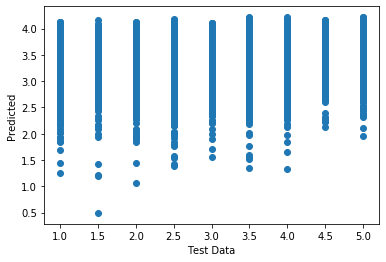

In [17]:
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.xlabel("Test Data")
plt.ylabel("Predicted")
plt.show()

It doesn't look like our model does a very good job of predicting the Yelp rating.  It would be beneficial to explore more factors, let's do that now.

## Test Different Subsets of Factors:

In [19]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']
# subset of all binary features
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
# subset of all features that are numerical but not binary
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
# all features
all_features = binary_features + numeric_features
# additional test on some features with higher correlation to ratings
feature_subset = ['average_tip_length', 'average_review_length', 'average_review_age', 'average_number_years_elite', 'has_bike_parking']

## Model New Subsets:

In [20]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # create variables for our x and y values
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # fit the model
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the model's score
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # predict the test data
    y_predicted = model.predict(X_test)
    
    # plot the predictions to the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Sentiment Features:
Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749612)]


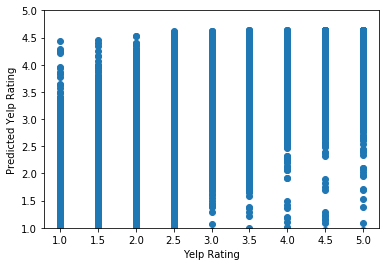

Binary Features:
Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]


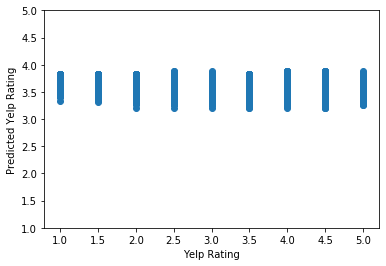

Numerical Features:
Train Score: 0.6734992593766658
Test Score: 0.6713318798120151
[('average_review_sentiment', 2.2721076642095714), ('price_range', -0.08046080962701326), ('average_number_years_elite', -0.07190366288054215), ('average_caption_length', -0.00334706600778448), ('number_pics', -0.0029565028128954863), ('number_tips', -0.0015953050789045838), ('number_cool_votes', 0.0011468839227079775), ('average_number_fans', 0.0010510602097412254), ('average_review_length', -0.0005813655692093357), ('average_tip_length', -0.0005322032063459733), ('number_useful_votes', -0.0002320378475871201), ('average_review_count', -0.0002243170289501482), ('average_review_age', -0.00016930608165055923), ('average_days_on_yelp', 0.00012878025876674438), ('weekday_checkins', 5.91858075448613e-05), ('weekend_checkins', -5.518176206999151e-05), ('average_number_friends', 4.8269921116315975e-05), ('review_count', -3.483483763748981e-05), ('number_funny_votes', -7.884395673808679e-06)]


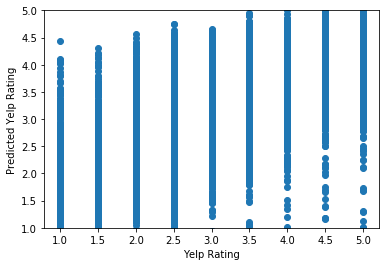

All Features:
Train Score: 0.6807828861895334
Test Score: 0.6782129045869247
[('average_review_sentiment', 2.2808456996623825), ('alcohol?', -0.14991498593470284), ('has_wifi', -0.12155382629261363), ('good_for_kids', -0.1180781442201382), ('price_range', -0.06486730150043177), ('average_number_years_elite', -0.06278939713895364), ('has_bike_parking', 0.027296969912292805), ('takes_credit_cards', 0.024451837853653652), ('take_reservations', 0.014134559172969846), ('number_pics', -0.0013133612300796843), ('average_number_fans', 0.0010267986822656814), ('number_cool_votes', 0.0009723722734409323), ('number_tips', -0.0008546563320873921), ('average_caption_length', -0.0006472749798195219), ('average_review_length', -0.0005896257920272453), ('average_tip_length', -0.00042052175034042557), ('number_useful_votes', -0.00027150641256153645), ('average_review_count', -0.000233983569025111), ('average_review_age', -0.00015776544111324774), ('average_days_on_yelp', 0.0001232614766288456), ('revie

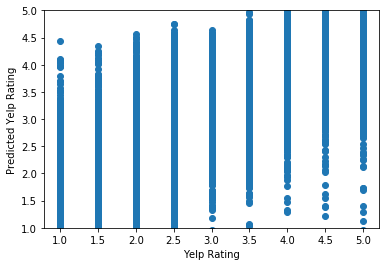

Correlated Features:
Train Score: 0.08660748893322145
Test Score: 0.08469875830353535
[('has_bike_parking', 0.086025529919571), ('average_number_years_elite', 0.005817607056774413), ('average_tip_length', -0.0010542371262914662), ('average_review_length', -0.000981026518172614), ('average_review_age', -0.0001161491662653939)]


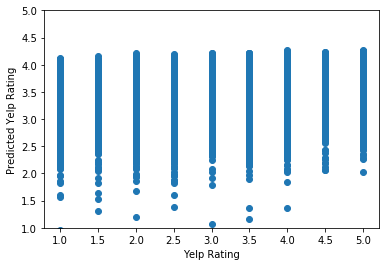

In [24]:
print("Sentiment Features:")
model_these_features(sentiment)
print("Binary Features:")
model_these_features(binary_features)
print("Numerical Features:")
model_these_features(numeric_features)
print("All Features:")
model_these_features(all_features)
print("Correlated Features:")
model_these_features(feature_subset)

It seems that the model did the best with all the features and did the worst with just the binary variables.  The best score was still only about 68% accurate.  We'll use all features to predict our new data in the next step.

## Predict New Data:

In [25]:
## Train model on all features
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

## Create New Data
new = np.array([1,1,1,0,1,1,50,3,3,5,10,300,.5,10,20,50,50,7,50,10,20,20,0,40,45]).reshape(1,-1)
model.predict(new)

array([3.40991378])

Since I used numbers in the example new data of values just above the means for each category, this number makes sense and seems a decent predictor.